rbf
Accuracy: 92.07723035952064


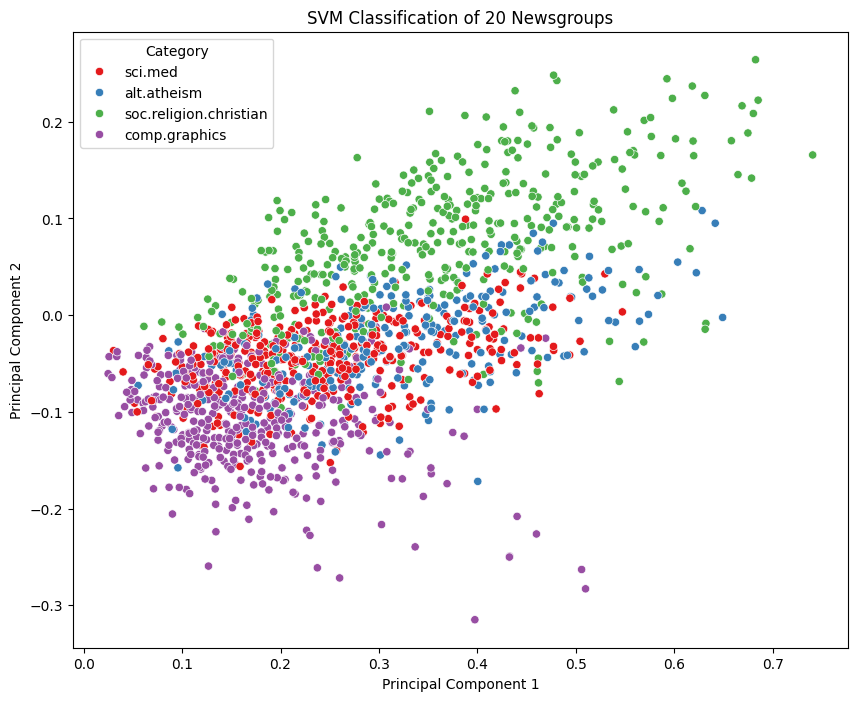

sigmoid
Accuracy: 92.07723035952064


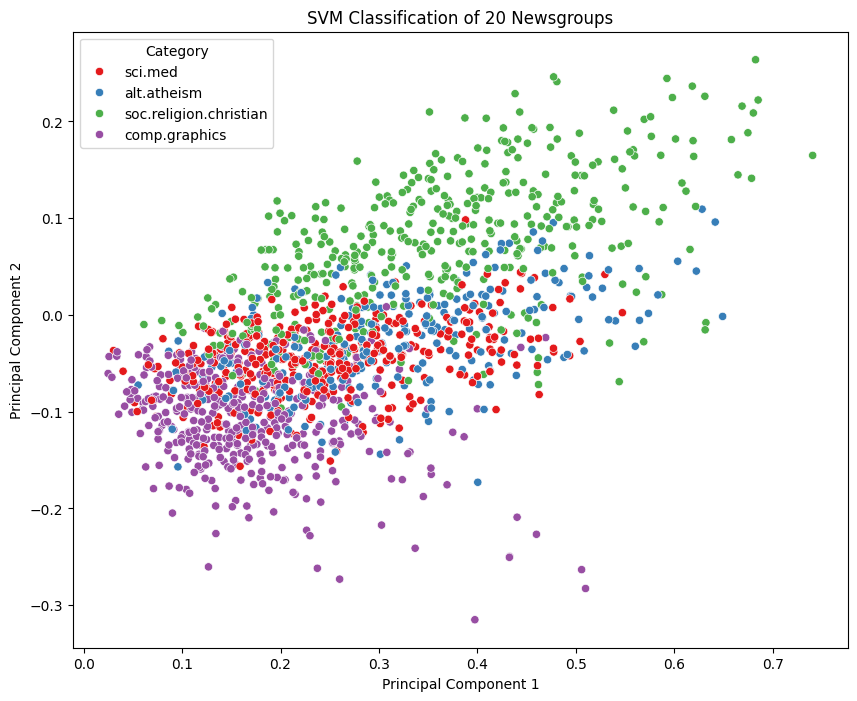

linear
Accuracy: 92.07723035952064


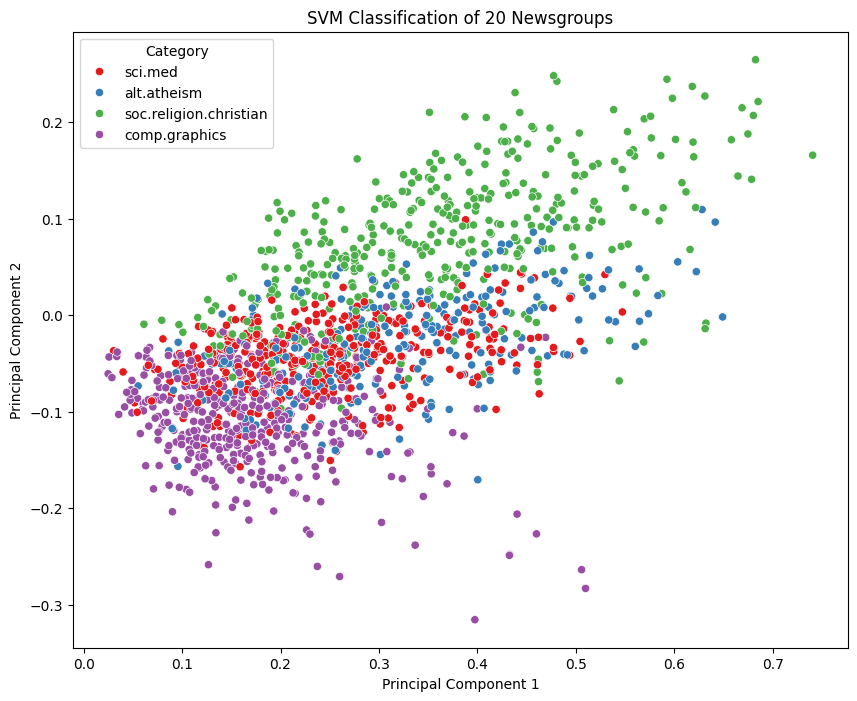

poly
Accuracy: 92.07723035952064


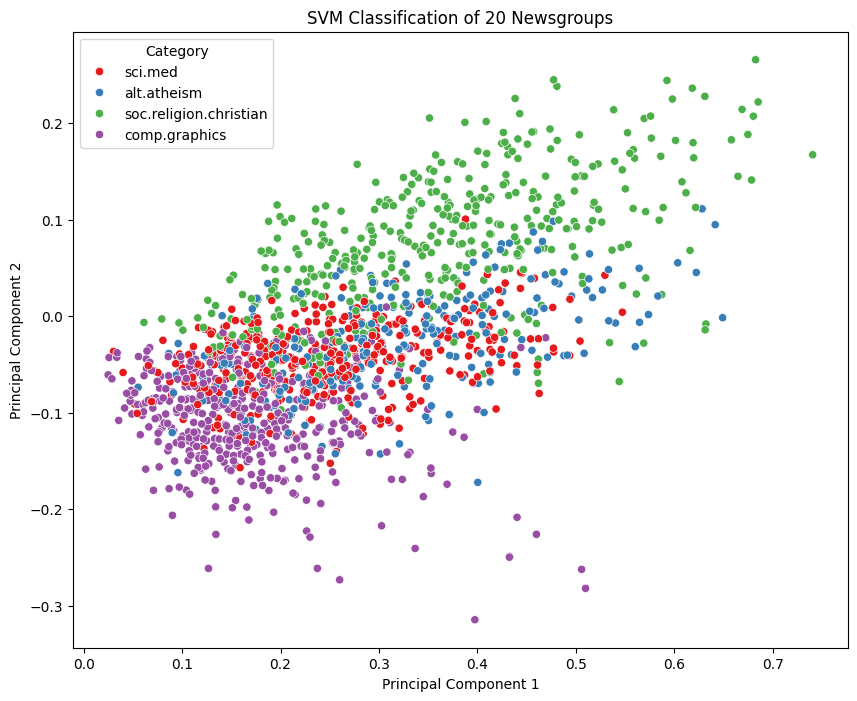

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Preprocess the data (convert text to features using TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test_tfidf = tfidf_vectorizer.transform(newsgroups_test.data)

kernels = ["rbf", "sigmoid", "linear", "poly"]
for kernel_c in kernels:
    # Train a linear SVM model
    print(kernel_c)
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train_tfidf, newsgroups_train.target)

    # Predict the labels for test data
    predicted = svm_classifier.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(newsgroups_test.target, predicted)
    print("Accuracy:", accuracy * 100)

    # Reduce dimensionality for plotting
    svd = TruncatedSVD(n_components=2)
    X_reduced = svd.fit_transform(X_test_tfidf)

    # Convert predicted labels to target names
    target_names = np.array(newsgroups_test.target_names)
    predicted_target_names = target_names[predicted]

    # Plot classification results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=predicted_target_names, palette='Set1', legend='full')
    plt.title('SVM Classification of 20 Newsgroups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Category')
    plt.show()
